# Practicing Statistical Tests

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from scipy import stats
import seaborn as sns
from scipy.stats import chi2
from scipy.stats import chi2_contingency
import statsmodels.stats.api as sms

In [4]:
df = pd.read_csv("case_study.csv", index_col = 0)

/Users/chaoalex/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (171) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Cleaning DRVISITS and NOCOV121

In [5]:
df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
49938,9.0,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
49939,9.0,2.0,2142017,2,14,2017,1200.0,2017000002,2.017000e+09,NaN,...,1.0,1.0,1.0,1.0,1.0,2.0,2.0,NaN,NaN,2.0
49940,9.0,1.0,1292017,1,29,2017,1200.0,2017000003,2.017000e+09,NaN,...,3.0,2.0,1.0,3.0,2.0,1.0,1.0,NaN,NaN,2.0
49941,9.0,7.0,9112017,9,11,2017,1200.0,2017000004,2.017000e+09,NaN,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,NaN,NaN,1.0
49942,9.0,5.0,7182017,7,18,2017,1200.0,2017000005,2.017000e+09,NaN,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,2.0


In [6]:
drvis_dict = {88: 0, 77:np.nan, 99:np.nan}
cov_dict = {1:True, 2:False, 7:np.nan, 9:np.nan}

In [7]:
df['DRVIS'] = df['DRVISITS'].replace(drvis_dict)

In [8]:
df['covered'] = df['NOCOV121'].replace(cov_dict)

In [9]:
df['covered'].unique()

array([nan,  0.,  1.])

In [10]:
## getting rid of nulls in our two columns

In [11]:
df.dropna(subset = ["DRVIS", "covered"], inplace=True)

In [12]:
len(df)

10161

In [13]:
len(df['DRVIS'])

10161

In [14]:
df.describe()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3,DRVIS,covered
count,10161.0,10161.000000,1.016100e+04,10161.000000,10161.000000,10161.000000,10161.000000,1.016100e+04,1.016100e+04,7017.0,...,10161.000000,10161.000000,10161.000000,10161.000000,10161.000000,4103.000000,4103.000000,9303.000000,10161.000000,10161.000000
mean,34.0,7.902077,8.252005e+06,8.092707,15.728078,2017.000295,1111.740970,2.017006e+09,2.017006e+09,1.0,...,2.321130,3.392973,2.606436,1.665683,1.701112,2.110894,2.185474,1.911964,6.363252,0.044681
std,0.0,3.228252,3.171654e+06,3.158676,9.278604,0.017181,32.192369,3.259834e+03,3.259834e+03,0.0,...,2.080117,2.288405,2.306554,2.152213,2.149191,2.304393,2.546202,1.443961,9.022087,0.206612
min,34.0,1.000000,1.022017e+06,1.000000,1.000000,2017.000000,1100.000000,2.017000e+09,2.017000e+09,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,34.0,6.000000,6.302017e+06,6.000000,7.000000,2017.000000,1100.000000,2.017003e+09,2.017003e+09,1.0,...,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000
50%,34.0,8.000000,8.252017e+06,8.000000,16.000000,2017.000000,1100.000000,2.017006e+09,2.017006e+09,1.0,...,2.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,4.000000,0.000000
75%,34.0,10.000000,1.106202e+07,11.000000,23.000000,2017.000000,1100.000000,2.017008e+09,2.017008e+09,1.0,...,2.000000,4.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,6.000000,0.000000
max,34.0,12.000000,1.230202e+07,12.000000,31.000000,2018.000000,1200.000000,2.017012e+09,2.017012e+09,1.0,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,76.000000,1.000000


### 95% Confidence Interval Mean

In [15]:
n = len(df['DRVIS'])
dr_mean = df['DRVIS'].mean()
dr_std = df['DRVIS'].std()
t_value_dr = stats.t.ppf(0.975, n-1)
margin_error_dr = t_value_dr*dr_std/(n**0.5)
conf_int_dr = (dr_mean - margin_error_dr, dr_mean + margin_error_dr)
conf_int_dr

(6.18780760837899, 6.538695688540604)

In [16]:
# graphic and sentence 
"""We can say with 95% confidence that a similar sample will have a mean number of 
doctor visits between 6.18 and 6.53 visits per month."""

'We can say with 95% confidence that a similar sample will have a mean number of \ndoctor visits between 6.18 and 6.53 visits per month.'

In [17]:
# "The confidence interval is shown in the following 2 plots: "
# "one in scale, the second zoomed in"

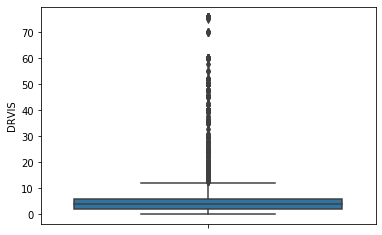

In [18]:
sns.boxplot(y=df['DRVIS'])

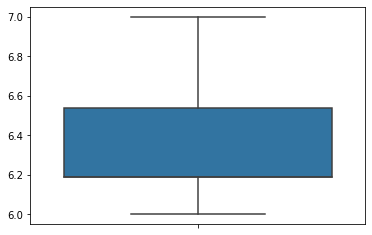

In [19]:
fake_data = [6, 6.18780760837899, 6.18780760837899, 6.18780760837899 ,6.18780760837899,
6.538695688540604, 6.538695688540604, 6.538695688540604, 7]
sns.boxplot(y=fake_data)

### 95% Confidence Interval Proportion

In [20]:
n_cov = len(df['covered'])
cov_mean = df['covered'].mean()
cov_std = df['covered'].std()
t_value_cov = stats.t.ppf(0.975, n-1)
margin_error_cov = t_value_cov * cov_std/(n_cov**0.5)
conf_int_cov = (cov_mean - margin_error_cov, cov_mean + margin_error_cov)
conf_int_cov

(0.040662854129353915, 0.04869842920890019)

In [21]:
# graphic and sentence 
"""We can say with 95% confidence that a similar sample will have a mean proportion 
of people not having insurance coverage between 4% and 4.8% over the course of a year."""

'We can say with 95% confidence that a similar sample will have a mean proportion \nof people not having insurance coverage between 4% and 4.8% over the course of a year.'

In [22]:
# "The confidence interval is shown in the following 2 plots: "
# "one in scale, the second zoomed in"

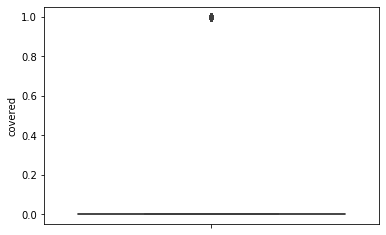

In [23]:
sns.boxplot(y=df['covered'])

In [24]:
fake_data_cov = [0.037, 0.040662854129353825, 0.040662854129353825,  0.040662854129353825,
                0.04869842920890028, 0.04869842920890028, 0.04869842920890028, 0.05]

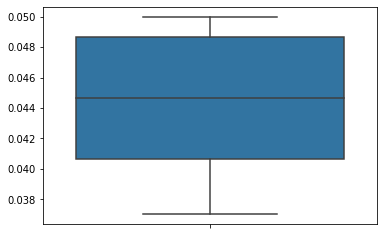

In [25]:
sns.boxplot(y = fake_data_cov)

In [26]:
sms.proportion_confint(454, 10161, alpha=0.05, method="normal")

(0.04066353045657347, 0.048697752881680635)

In [27]:
#sms.DescrStatsW(df["NOCOV121"]).tconfint_mean()

### 2 Sample T-Test Mean

In [28]:
# do men have less doctor visits than women? 

In [29]:
# H0:x_bar(men) = x_bar(women), Ha:x_bar(men) < x_bar(women)
doctor_visit_sex = df.groupby('SEX')['DRVIS'].describe()


In [30]:
doctor_visit_sex

,count,mean,std,min,25%,50%,75%,max
SEX,,,,,,,,
1.0,4188.0,5.904011,8.613887,0.0,2.0,3.0,6.0,76.0
2.0,5973.0,6.685250,9.284791,0.0,2.0,4.0,7.0,76.0


In [31]:
male_df =  df.loc[df['SEX'] == 1.0]
std1=male_df['DRVISITS'].std()

In [32]:
female_df =  df.loc[df['SEX'] == 2.0]
std2=female_df['DRVISITS'].std()

In [33]:
sp_square=(((4188-1)*std1**2)+((5973-1)*std2**2))/(4188+5973-2)


### 2 Sample T-Test Proportion

In [34]:
# - Perform a two sample test of proportions.
#     compare sex for nocov121
# Ho: There is no difference between males and females in rates of uninsuredness in past year
# Ha: There is a difference between males and females in rates of uninsuredness in past year
# alpha = 0.05

In [35]:
# splitting data based on male or female
# df['male'] = np.where(df['SEX'] == 1, 1, 0)
#  only_male_cov_prop = np.where(df['SEX'] == 1, df['covered'], 0)

In [36]:
only_male = df.loc[df['SEX'] == 1]
only_females = df.loc[df['SEX'] == 2]

In [37]:
stats.ttest_ind(only_male['covered'], only_females['covered'])

Ttest_indResult(statistic=0.6708576714847624, pvalue=0.5023264551308528)

In [38]:
"""With 95% confidence, we can say that a similarly chosen sample of people from NY, NJ, 
and CT will have similar rates of lacking health insurance over the course of a year 
between men and women"""

'With 95% confidence, we can say that a similarly chosen sample of people from NY, NJ, \nand CT will have similar rates of lacking health insurance over the course of a year \nbetween men and women'

In [39]:
only_male['covered'].mean()

0.04632282712511939

In [40]:
# changing values in df so they map correctly to xlabels
male_female_dict = {1.0:'Male', 2.0:'Female'}
df['SEX'].replace(male_female_dict, inplace=True)

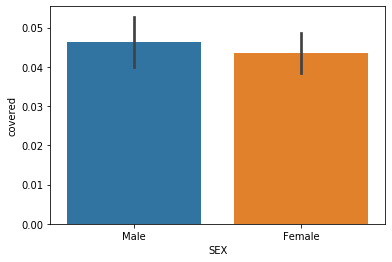

In [41]:
## Not sure how to do bar chart lol
sns.barplot(y = df['covered'],
           x = df['SEX'])

### Chi Square Test 

In [42]:
# Ho: There is no difference between the amount people smoke and the amount of doctor
# visits they have over the course of a year 
# Ha: There is a difference between the amount people smoke and the amount of doctor
# visits they have over the course of a year 
# alpha = 0.05

In [43]:
# cleaning smoking data 
df['smoking'] = np.where(df['SMOKE100']==2, 3, df['SMOKDAY2'])
# 3 means no, 2 sometimes, 1 always 

In [44]:
df['smoking'].value_counts()

3.0    8597
1.0     778
2.0     387
9.0       3
7.0       1
Name: smoking, dtype: int64

In [45]:
smok_dict = {7: np.nan, 9:np.nan}
df['smoking'].replace(smok_dict, inplace=True)

In [46]:
df['smoking'].dropna(inplace=True)

In [47]:
len(df['smoking'])

9762

In [48]:
# getting number of doctor visits data
# count of people per state who visit doctor (goes, sometimes goes, doesn't go) DRVISIT 
## separating each drvisit value to a different bin
def bin_drvisit(df):
    if df['DRVIS'] == 0:
        return "Never"
    elif 1 <= df['DRVIS'] < 5:
        return "Sometimes"
    else:
        return "Often"

In [49]:
df['num_doc_visits'] = df.apply(bin_drvisit, axis=1)

In [50]:
len(df['num_doc_visits'])

10161

In [51]:
# getting the data ready to be in a contingency table 
grouped_smok_vis = df.groupby(['smoking', 'num_doc_visits']).num_doc_visits.count()

In [52]:
grouped_smok_vis.values

array([  66,  342,  370,   20,  151,  216,  446, 3342, 4809])

In [53]:
list1 = [i for index, i in enumerate(grouped_smok_vis.values) if index %3 == 0]

In [54]:
list2 = [i for index, i in enumerate(grouped_smok_vis.values) if index % 3 == 1]

In [55]:
list3 = [i for index, i in enumerate(grouped_smok_vis.values) if index % 3 == 2]

In [56]:
table = [list1, list2, list3]

In [57]:
table

[[66, 20, 446], [342, 151, 3342], [370, 216, 4809]]

In [58]:
stat, p, dof, expected = chi2_contingency(table)

In [59]:
print(expected)

[[  42.39868879   21.09035034  468.51096087]
 [ 305.63716452  152.03288261 3377.32995288]
 [ 429.96414669  213.87676706 4751.15908625]]


In [60]:
print(dof)

4


In [61]:
prob = 0.95
critical = chi2.ppf(prob, dof)

In [62]:

print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

probability=0.950, critical=9.488, stat=28.067
Dependent (reject H0)


In [63]:
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

significance=0.050, p=0.000
Dependent (reject H0)


In [64]:
# Reject the null hypothesis showing that there is a significant difference between the amount people
# smoke and the amount of times they visit the doctor 

In [65]:
# graphic if we have time 

### One Way ANOVA Test

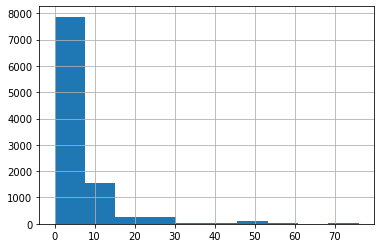

In [66]:
df['DRVIS'].hist()

In [67]:
insur_dict = {1: "Bought through employer", 2: "Bought independently", 3: "Government provided",
              4: "Government provided", 5: "Government provided", 6: np.nan, 7: np.nan, 8:np.nan, 77:np.nan,
              99:np.nan}

df['insurance_provider'] = df["HLTHCVR1"].replace(insur_dict)

In [88]:
df['insurance_provider'].unique()

array(['Government provided', 'Bought through employer',
       'Bought independently'], dtype=object)

In [68]:
len(df['insurance_provider'])

10161

In [114]:
df = df.dropna(subset=['insurance_provider'])

In [115]:
len(df['insurance_provider'])

9754

In [85]:
df.columns

Index(['_STATE', 'FMONTH', 'IDATE', 'IMONTH', 'IDAY', 'IYEAR', 'DISPCODE',
       'SEQNO', '_PSU', 'CTELENM1',
       ...
       '_RFSEAT2', '_RFSEAT3', '_FLSHOT6', '_PNEUMO2', '_AIDTST3', 'DRVIS',
       'covered', 'smoking', 'num_doc_visits', 'insurance_provider'],
      dtype='object', length=363)

In [111]:
df.insurance_provider.value_counts(dropna=False)

Bought through employer    4609
Government provided        4121
Bought independently       1024
Name: insurance_provider, dtype: int64

In [117]:
(df['insurance_provider'] == 'Bought independently').value_counts()

False    8730
True     1024
Name: insurance_provider, dtype: int64

In [109]:
pd.set_option('display.max_columns', 50)

In [116]:
df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,PVTRESD1,COLGHOUS,STATERE1,CELLFON4,LADULT,NUMADULT,NUMMEN,NUMWOMEN,SAFETIME,CTELNUM1,CELLFON5,CADULT,PVTRESD3,CCLGHOUS,CSTATE1,...,PAMISS1_,PAMIN11_,PAMIN21_,PA1MIN_,PAVIG11_,PAVIG21_,PA1VIGM_,_PACAT1,_PAINDX1,_PA150R2,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3,DRVIS,covered,smoking,num_doc_visits,insurance_provider
273401,34.0,1.0,4072017,4,7,2017,1100.0,2017000118,2.017000e+09,1.0,1.0,NaN,1.0,1.0,NaN,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0,3.0,3.0,2.0,2.0,4.0,2.0,1.0,1.0,1.0,1.0,2.0,3.0,0.0,3.0,Sometimes,Government provided
273402,34.0,1.0,3022017,3,2,2017,1100.0,2017000119,2.017000e+09,1.0,1.0,NaN,1.0,1.0,NaN,1.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0,3.0,3.0,2.0,1.0,3.0,2.0,1.0,1.0,1.0,2.0,9.0,10.0,0.0,3.0,Often,Government provided
273404,34.0,2.0,3262017,3,26,2017,1200.0,2017000121,2.017000e+09,1.0,1.0,NaN,1.0,1.0,NaN,1.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.0,NaN,NaN,NaN,NaN,NaN,NaN,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,NaN,NaN,NaN,1.0,0.0,NaN,Sometimes,Bought through employer
273405,34.0,2.0,3282017,3,28,2017,1100.0,2017000122,2.017000e+09,1.0,1.0,NaN,1.0,1.0,NaN,1.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0,3.0,3.0,2.0,2.0,4.0,2.0,1.0,1.0,2.0,1.0,1.0,4.0,0.0,3.0,Sometimes,Government provided
273406,34.0,2.0,3262017,3,26,2017,1100.0,2017000123,2.017000e+09,1.0,1.0,NaN,1.0,1.0,NaN,2.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0,3.0,3.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0,5.0,0.0,3.0,Often,Bought through employer


In [118]:
bought_ind = df.loc[df['insurance_provider'] == 'Bought independently']

In [119]:
bought_ind

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,PVTRESD1,COLGHOUS,STATERE1,CELLFON4,LADULT,NUMADULT,NUMMEN,NUMWOMEN,SAFETIME,CTELNUM1,CELLFON5,CADULT,PVTRESD3,CCLGHOUS,CSTATE1,...,PAMISS1_,PAMIN11_,PAMIN21_,PA1MIN_,PAVIG11_,PAVIG21_,PA1VIGM_,_PACAT1,_PAINDX1,_PA150R2,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3,DRVIS,covered,smoking,num_doc_visits,insurance_provider
273408,34.0,2.0,4182017,4,18,2017,1100.0,2017000125,2.017000e+09,1.0,1.0,NaN,1.0,1.0,NaN,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,9.0,9.0,9.0,9.0,9.0,1.0,9.0,9.0,1.0,1.0,9.0,9.0,1.0,12.0,0.0,3.0,Often,Bought independently
273414,34.0,3.0,5312017,5,31,2017,1100.0,2017000131,2.017000e+09,1.0,1.0,NaN,1.0,1.0,NaN,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,280.0,NaN,280.0,140.0,NaN,140.0,9.0,1.0,1.0,9.0,9.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,0.0,3.0,Sometimes,Bought independently
273421,34.0,3.0,5312017,5,31,2017,1100.0,2017000138,2.017000e+09,1.0,1.0,NaN,1.0,1.0,NaN,1.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0,3.0,3.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,2.0,10.0,0.0,3.0,Often,Bought independently
273441,34.0,2.0,5162017,5,16,2017,1100.0,2017000158,2.017000e+09,1.0,1.0,NaN,1.0,1.0,NaN,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,180.0,0.0,180.0,0.0,0.0,0.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,NaN,NaN,2.0,2.0,0.0,3.0,Sometimes,Bought independently
273459,34.0,1.0,3012017,3,1,2017,1100.0,2017000176,2.017000e+09,1.0,1.0,NaN,1.0,1.0,NaN,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,280.0,42.0,322.0,140.0,21.0,161.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,4.0,0.0,3.0,Sometimes,Bought independently
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284739,34.0,12.0,1032017,1,3,2017,1100.0,2017011467,2.017011e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,2.0,1.0,NaN,1.0,...,0.0,180.0,60.0,240.0,0.0,0.0,0.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,2.0,5.0,0.0,3.0,Often,Bought independently
284743,34.0,12.0,1042017,1,4,2017,1100.0,2017011471,2.017011e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,2.0,1.0,NaN,1.0,...,0.0,135.0,840.0,975.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,2.0,2.0,0.0,3.0,Sometimes,Bought independently
284748,34.0,12.0,12292017,12,29,2017,1100.0,2017011476,2.017011e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,1.0,...,0.0,600.0,0.0,600.0,300.0,0.0,300.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0,2.0,0.0,3.0,Sometimes,Bought independently
284770,34.0,12.0,1082017,1,8,2017,1100.0,2017011498,2.017011e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,1.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0,3.0,3.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,2.0,1.0,0.0,3.0,Sometimes,Bought independently


In [120]:
bought_ind['DRVIS'].unique()

array([12.,  1., 10.,  2.,  4., 11.,  3.,  6.,  5., 30., 24.,  0.,  8.,
       20., 36., 15.,  7.,  9., 50., 25., 18., 40., 76., 16., 17., 22.,
       52., 60., 28.])

In [130]:
govt_bought = df.loc[df['insurance_provider'] == "Government provided"]

In [122]:
emp_bought = df.loc[df['insurance_provider'] == "Bought through employer"]

In [123]:
# df.groupby(['num_doc_visits', 'insurance_provider']).insurance_provider.count()

In [124]:
emp_bought

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,PVTRESD1,COLGHOUS,STATERE1,CELLFON4,LADULT,NUMADULT,NUMMEN,NUMWOMEN,SAFETIME,CTELNUM1,CELLFON5,CADULT,PVTRESD3,CCLGHOUS,CSTATE1,...,PAMISS1_,PAMIN11_,PAMIN21_,PA1MIN_,PAVIG11_,PAVIG21_,PA1VIGM_,_PACAT1,_PAINDX1,_PA150R2,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3,DRVIS,covered,smoking,num_doc_visits,insurance_provider
273404,34.0,2.0,3262017,3,26,2017,1200.0,2017000121,2.017000e+09,1.0,1.0,NaN,1.0,1.0,NaN,1.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.0,NaN,NaN,NaN,NaN,NaN,NaN,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,NaN,NaN,NaN,1.0,0.0,NaN,Sometimes,Bought through employer
273406,34.0,2.0,3262017,3,26,2017,1100.0,2017000123,2.017000e+09,1.0,1.0,NaN,1.0,1.0,NaN,2.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0,3.0,3.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0,5.0,0.0,3.0,Often,Bought through employer
273410,34.0,2.0,5182017,5,18,2017,1100.0,2017000127,2.017000e+09,1.0,1.0,NaN,1.0,1.0,NaN,3.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,56.0,84.0,140.0,28.0,42.0,70.0,3.0,2.0,2.0,2.0,2.0,1.0,3.0,2.0,1.0,1.0,NaN,NaN,2.0,3.0,0.0,3.0,Sometimes,Bought through employer
273411,34.0,3.0,6192017,6,19,2017,1100.0,2017000128,2.017000e+09,1.0,1.0,NaN,1.0,1.0,NaN,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,120.0,140.0,260.0,60.0,70.0,130.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,2.0,1.0,0.0,2.0,Sometimes,Bought through employer
273413,34.0,3.0,6062017,6,6,2017,1100.0,2017000130,2.017000e+09,1.0,1.0,NaN,1.0,1.0,NaN,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0,3.0,3.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,2.0,3.0,0.0,3.0,Sometimes,Bought through employer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284769,34.0,12.0,12282017,12,28,2017,1100.0,2017011497,2.017011e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,1.0,...,0.0,0.0,168.0,168.0,0.0,0.0,0.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,2.0,9.0,0.0,3.0,Often,Bought through employer
284771,34.0,12.0,1022017,1,2,2017,1100.0,2017011499,2.017011e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,2.0,1.0,NaN,1.0,...,0.0,180.0,0.0,180.0,0.0,0.0,0.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0,2.0,0.0,3.0,Sometimes,Bought through employer
284774,34.0,12.0,12272017,12,27,2017,1100.0,2017011502,2.017012e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,1.0,...,0.0,630.0,0.0,630.0,315.0,0.0,315.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,9.0,0.0,0.0,3.0,Never,Bought through employer
284775,34.0,12.0,12292017,12,29,2017,1100.0,2017011503,2.017012e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,3.0,3.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,2.0,25.0,0.0,3.0,Often,Bought through employer


In [125]:
# insur_doc = df.groupby(['num_doc_visits', 'insurance_provider']).insurance_provider.count().values

In [131]:
stats.f_oneway(bought_ind['DRVIS'], govt_bought['DRVIS'], emp_bought['DRVIS'])

F_onewayResult(statistic=61.70179071325623, pvalue=2.3517895521422863e-27)